# Examples of different distributions, typical usa case and data type
## Descrete
 1. Binomial (Bernoulli)


## Continuous
 1. Normal (Gaussian)
 2. Long-tailed (example?)
 3. t-Distribution
 4. Poison
 5. Exponential
 6. Weibul


full lits: https://en.wikipedia.org/wiki/List_of_probability_distributions

In [22]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import nbinom, probplot
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import sympy
from sympy.abc import x, z

In [32]:
# helper functions
def dice_roll(size):
    """ roll the d6, duh! """
    result = []
    for _ in range(size):
        result.append(random.randint(1,6))
    return result

def compute_bins(n_bins, input_df, target_column):
    """ compute the data slices for every bin """
    d = {}
    step = (max(input_df[target_column]) - min(input_df[target_column])) / n_bins
    for i in range(n_bins+1):
        d[i+1] = (round(min(input_df[target_column]) + i*step, 2), 
                  round(min(input_df[target_column]) + (i+1)*step, 2))
    return d


def in_range(inp, range):
    """ helper float comparison """
    return inp >= range[0] and inp < range[1]

def prepare_frequency_table(n_bins, df, target, value_mapper):
    count = []
    for i in range(1, n_bins+1):
        count.append(df[target][df[target].apply(lambda x: in_range(x, value_mapper[i]))].count())
    data = {'bin_number': [i for i in range(1, n_bins+1)], 
            'value': [value_mapper[i] for i in range(1, n_bins+1)],
            'count': count}
    return pd.DataFrame.from_dict(data)


In [24]:
# Binomial distribution with parameters n and p 
# is the discrete probability distribution of the number 
# of successes in a sequence of n independent experiments.
# p = 1, 1-p = 0
# wiki: https://en.wikipedia.org/wiki/Binomial_distribution
rolls = dice_roll(10000)
rolls_df = pd.DataFrame({'dice_roll':rolls})
rolls_df.head(5)

,dice_roll
0,2
1,6
2,1
3,6
4,2


In [25]:
# Frequency table:
n_bins = 10
d = {}
value_mapper = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:0, 8:0, 9:0, 10:0}
for i in range(1, n_bins+1):
    d[i] = rolls.count(i)
data = {'bin_number': [i for i in range(1, n_bins+1)], 
        'value': [value_mapper[i] for i in range(1, n_bins+1)],
        'count': [d[i] for i in range(1, n_bins+1)]}
df = pd.DataFrame.from_dict(data)
df.head(10)

,bin_number,value,count
0,1,1,1707
1,2,2,1626
2,3,3,1682
3,4,4,1703
4,5,5,1663
5,6,6,1619
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


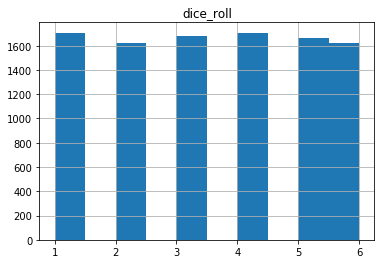

In [26]:
# Histogram -> does it make sense here?
hist = rolls_df.hist(bins=n_bins)

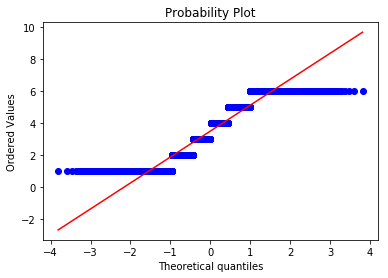

In [27]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(rolls, plot=plt)

In [28]:
# Normal Distribution (Bell curve, Gaussian)
mu, sigma = 9.5, 0.7 # mean and standard deviation
normal_sample = np.random.normal(mu, sigma, 1000)
normal_df_generated = pd.DataFrame({'100dash_sec':normal_sample})
normal_df_generated.head()

,100dash_sec
0,9.612298
1,10.663125
2,9.857131
3,9.650337
4,9.340948


In [47]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, normal_df_generated, '100dash_sec')
df = prepare_frequency_table(n_bins, normal_df_generated, '100dash_sec', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(9.53, 9.75)",135
11,12,"(9.75, 9.98)",128
12,13,"(9.98, 10.21)",84
13,14,"(10.21, 10.43)",56
14,15,"(10.43, 10.66)",51
15,16,"(10.66, 10.89)",30
16,17,"(10.89, 11.11)",16
17,18,"(11.11, 11.34)",5
18,19,"(11.34, 11.57)",2
19,20,"(11.57, 11.79)",1


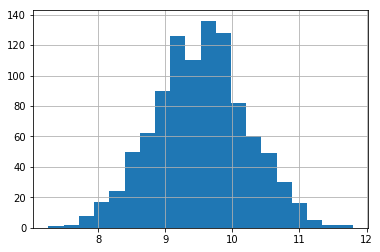

In [48]:
hist = normal_df_generated['100dash_sec'].hist(bins=n_bins)

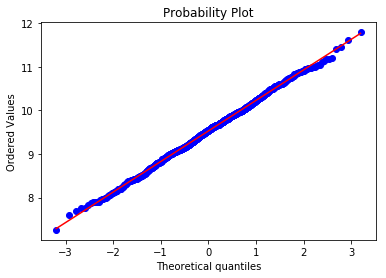

In [49]:
# QQplot or probplot
ax1 = plt.subplot()
chart = stats.probplot(normal_df_generated['100dash_sec'], plot=plt)

In [87]:
# Student's t-distribution
s = np.random.standard_t(10, size=100000)
student_df = pd.DataFrame({'observation':s})
student_df.head()

,observation
0,0.501700
1,-0.865149
2,1.730678
3,-0.094254
4,-0.804820


In [88]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, student_df, 'observation')
df = prepare_frequency_table(n_bins, student_df, 'observation', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(0.23, 1.07)",25592
11,12,"(1.07, 1.91)",11338
12,13,"(1.91, 2.75)",3334
13,14,"(2.75, 3.59)",725
14,15,"(3.59, 4.43)",165
15,16,"(4.43, 5.26)",52
16,17,"(5.26, 6.1)",15
17,18,"(6.1, 6.94)",0
18,19,"(6.94, 7.78)",0
19,20,"(7.78, 8.62)",2


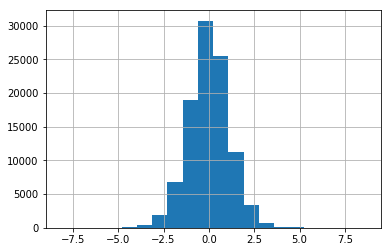

In [89]:
# Histogram 
hist = student_df['observation'].hist(bins=n_bins)

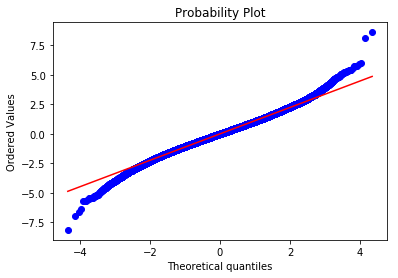

In [90]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(student_df['observation'], plot=plt)

In [50]:
# What is this vong distribution her? 
normal_df = pd.read_csv('data/100m.csv')
normal_df['Result'] = normal_df['Result'].mask(normal_df['Result'].eq('None')).dropna()
normal_df = normal_df[pd.notnull(normal_df['Result'])]
normal_df['Result'] = normal_df['Result'].apply(lambda x: float(x))
normal_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81
1,M,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89
2,M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91
3,M,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69
4,M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89


In [51]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, normal_df[normal_df['Gender'] == 'M'], 'Result')
df = prepare_frequency_table(n_bins, normal_df, 'Result', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(11.12, 11.26)",13
11,12,"(11.26, 11.41)",3
12,13,"(11.41, 11.56)",3
13,14,"(11.56, 11.71)",5
14,15,"(11.71, 11.86)",1
15,16,"(11.86, 12.01)",7
16,17,"(12.01, 12.15)",0
17,18,"(12.15, 12.3)",4
18,19,"(12.3, 12.45)",0
19,20,"(12.45, 12.6)",0


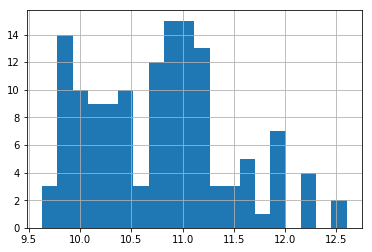

In [52]:
# Histogram 
hist = normal_df['Result'].hist(bins=n_bins)

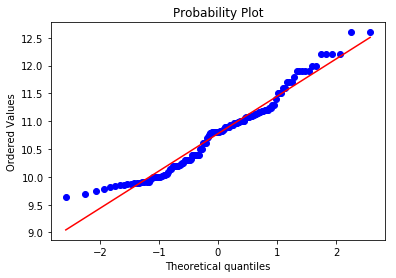

In [53]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(normal_df['Result'], plot=plt)